In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

(187, 375, 3)


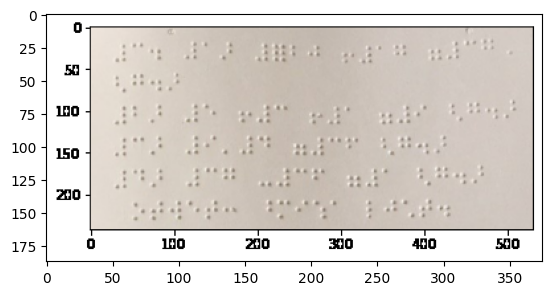

In [9]:
im = cv2.imread('data/braille.png')
print(im.shape)
plt.imshow(im)

(187, 375)


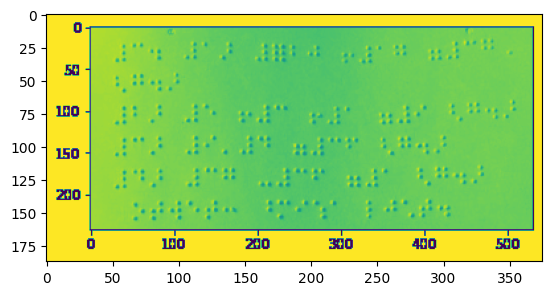

In [10]:
bw_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(bw_im.shape)
plt.imshow(bw_im)

# Braille Image Processing
If we want to apply image classification to recognize the text, we need to cut out individual symbols to make them similar to MNIST images that we have seen before. This can be done using object detection technique which we will discuss later, but also we can try to use pure computer vision for that. A good description of how computer vision can be used for character separation can be found in this blog post - we will only focus on some computer vision techniques here.

First, let's try to enhance the image a little bit. We can use the idea of thresholding (well described in this OpenCV article):

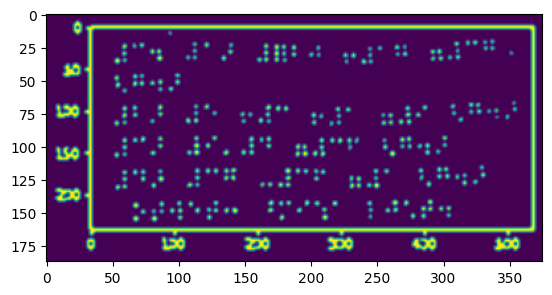

In [15]:
im = cv2.blur(bw_im,(3,3))
# plt.imshow(im)
im = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 5, 4)
plt.imshow(im)
im = cv2.medianBlur(im,3)
_,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
im = cv2.GaussianBlur(im, (3,3), 0)
plt.imshow(im)



To work with images, we need to "extract" individual dots, i.e. convert the images to a set of coordinates of individual dots.

We can do that using feature extraction techniques, such as SIFT, SURF or ORB:

In [17]:
orb =cv2.ORB_create(5000)
f,d = orb.detectAndCompute(im,None)
print(f" First 5 points  :{ [f[i].pt for i in range(5)]}")

 First 5 points  :[(187.0, 31.0), (200.0, 31.0), (206.0, 31.0), (226.0, 31.0), (245.0, 31.0)]


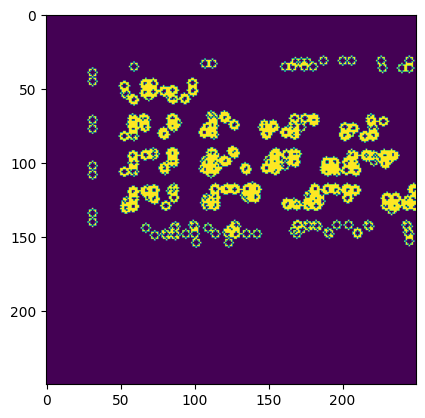

In [19]:
# Let's plot all points to make sure we got things right:

def plot_dots(dots):
    img = np.zeros((250,250))
    for x in dots:
        cv2.circle(img,(int(x[0]),int(x[1])),3,(255,0,0))
    plt.imshow(img)
pts = [x.pt for x in f]
plot_dots(pts)

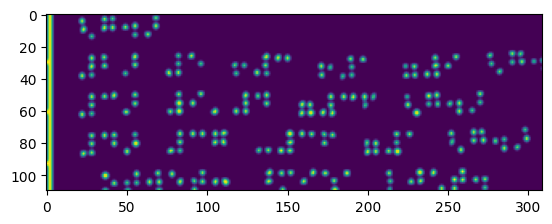

In [20]:

min_x, min_y, max_x, max_y  = [int(f([z[i] for z in pts])) for f in (min,max) for i in (0,1)]
min_y+=13
plt.imshow(im[min_y:max_y,min_x:max_x])
